# Monte Carlo simulation with parallel and timeit

I start by importing necessary libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

Load and format data

In [2]:
file_path = "apple.2011.csv"
df = pd.read_csv(file_path, sep=',',na_values='XXXXX', names = ['Date', 'Last', 'Change'], skiprows=1)
df = df.fillna(0)
df['Date'] = pd.to_datetime(df['Date'])
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')

I run the simulation for 20 days to return the expected price based on Gaussian random numbers.

In [3]:
mu = np.mean(df['Change'])
sigma = np.std(df['Change'])
days = 20

def distribution(mu, sigma,days):
    values = np.random.normal(mu, sigma, days)
    price = df.iloc[-1]['Last']
    for val in values:
        price += price*val
    return price


Run and plot the Monte Carlo simulation 10,000 times

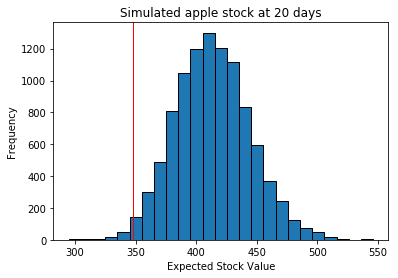

In [4]:
Val = []
for i in range(0,10000):
    value = distribution(mu, sigma,days)
    Val.append(value)

per = np.percentile(Val, 1)
plt.axvline(per, color='r', linestyle='solid', linewidth=1)
count, bins, re = plt.hist(Val, 25,edgecolor='black')
plt.title('Simulated apple stock at 20 days')
plt.xlabel('Expected Stock Value')
plt.ylabel('Frequency')

VaR with 99% confidence

### I decided to combine the process of montecarlo simulation into one function

In [5]:

days = 20
iterations = 10000
price = df.iloc[-1]['Last']
def MonteSim(iterations,mu, sigma, days,price):
    Val = []
    values = np.random.normal(mu, sigma, days)
    #price = df.iloc[-1]['Last']
    for val in values:
        price += price*val     
        for i in range(0,iterations):
            #value = price
        #distribution(mu, sigma,days)
            Val.append(price)
    

    var_99 = np.percentile(Val, 1)

    return format(var_99,'.3f') 


In [6]:
print MonteSim(iterations,mu, sigma, days,price)

394.432


In [7]:
%timeit MonteSim(iterations,mu, sigma, days,price)

10 loops, best of 3: 28.8 ms per loop


In [8]:
#https://ipython.org/ipython-doc/2/parallel/parallel_demos.html#parallel-examples

#from IPython import parallel
#clients = parallel.Client()
#clients.block = True
#print clients.ids
#display engines after initialization
#dview = clients.direct_view()
from ipyparallel import Client
c = Client()
c.ids

set([0,1,2,3])


c[:].apply_sync(lambda: "Hello World")

['Hello World', 'Hello World', 'Hello World', 'Hello World']

In [14]:


#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#import sys


file_path = "apple.2011.csv"
df = pd.read_csv(file_path, sep=',',na_values='XXXXX', names = ['Date', 'Last', 'Change'], skiprows=1)
df = df.fillna(0)
df['Date'] = pd.to_datetime(df['Date'])
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')
mu = np.mean(df['Change'])
sigma = np.std(df['Change'])
days = 20
iterations = 10000
price = int(df['Last'].tail(1))

def MonteSim(iterations,mu, sigma, days,price):
       
    Val = []
    values = np.random.normal(mu, sigma, days)
    #price = df.iloc[-1]['Last']
    for val in values:
        price += price*val     
        for i in range(0,iterations):
            #---------value = price
        #--------distribution(mu, sigma,days)
            Val.append(price)
    

    var_99 = np.percentile(Val, 1)

    return format(var_99,'.3f') 





#x = dview.gather('iterations')
#print x
%timeit MonteSim(iterations,mu, sigma, days,price)

10 loops, best of 3: 28.2 ms per loop


In [22]:



%timeit result_arrays = c[:].apply_sync(MonteSim, iterations,mu, sigma, days,price)
print result_arrays


10 loops, best of 3: 40.9 ms per loop
['398.847', '370.034', '397.432', '378.008']
